In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:

df = pd.read_csv('salary_data_cleaned.csv')

In [133]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,company_text,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist - Finance & Business Operations...,$55K-$97K (Glassdoor est.),EMPLOYMENT VALUE PROPOSITION: Mental Health Ce...,4.0,Mental Health Center of Denver\n4.0,"Denver, CO","Denver, CO",501 to 1000 employees,-1,Nonprofit Organization,...,76.0,Mental Health Center of Denver\n,CO,1,-1,1,0,0,0,1
1,Data Scientist,$55K-$97K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,76.0,ManTech\n,VA,0,52,0,0,0,0,0
2,"Machine Learning Engineer, Data Science",$55K-$97K (Glassdoor est.),Atlassian is continuing to hire for all open r...,4.3,Atlassian\n4.3,"Mountain View, CA","Sydney, Australia",1001 to 5000 employees,2002,Company - Public,...,76.0,Atlassian\n,CA,0,18,1,0,1,0,0
3,Data Analyst - eCommerce,$55K-$97K (Glassdoor est.),Data Analyst - eCommerce\nCorporate Headquarte...,3.3,Uline\n3.3,"Milwaukee, WI","Pleasant Prairie, WI",5001 to 10000 employees,1980,Company - Private,...,76.0,Uline\n,WI,0,40,0,0,0,0,0
4,Data Engineer 5 - Contract,$55K-$97K (Glassdoor est.),Purposes\n\nThis is a contract position that w...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,...,76.0,The Church of Jesus Christ of Latter-day Saints\n,UT,0,-1,0,0,0,0,1


In [134]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [135]:
def title_simplifier(title):  ## Job title 
    if 'data scientist' in title.lower():
        return 'data scienctist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):  ## seniority
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    

In [136]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [137]:
df.job_simp.value_counts()

data scienctist    2
analyst            1
data engineer      1
mle                1
Name: job_simp, dtype: int64

In [138]:
df['seniority'] = df['Job Title'].apply(seniority)

In [139]:
df.seniority.value_counts()

na    5
Name: seniority, dtype: int64

In [140]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0    3488
1    3962
2    4940
3    2786
4    3393
Name: desc_len, dtype: int64

In [141]:
#Competitor Count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0                                 -1
1                                 -1
2                             GitHub
3    The Home Depot, Foxconn, Amazon
4                                 -1
Name: Competitors, dtype: object

In [142]:
#Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1 )
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis =1 )
df[df.hourly ==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary


In [143]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [144]:
#Removes the new line in the company name
df['company_text'] = df.company_text.apply(lambda x: x.replace('\n',''))
df['company_text']

0                     Mental Health Center of Denver
1                                            ManTech
2                                          Atlassian
3                                              Uline
4    The Church of Jesus Christ of Latter-day Saints
Name: company_text, dtype: object

In [145]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,5.000000,5.00000
mean,3.980000,1189.600000,0.0,0.0,55.0,97.0,76.0,0.200000,21.600000,0.400000,0.0,0.200000,0.0,0.400000,3713.800000,0.80000
std,0.396232,1086.932519,0.0,0.0,0.0,0.0,0.0,0.447214,23.964557,0.547723,0.0,0.447214,0.0,0.547723,803.100367,1.30384
min,3.300000,-1.000000,0.0,0.0,55.0,97.0,76.0,0.000000,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,2786.000000,0.00000
25%,4.000000,-1.000000,0.0,0.0,55.0,97.0,76.0,0.000000,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,3393.000000,0.00000
50%,4.100000,1968.000000,0.0,0.0,55.0,97.0,76.0,0.000000,18.000000,0.000000,0.0,0.000000,0.0,0.000000,3488.000000,0.00000
75%,4.200000,1980.000000,0.0,0.0,55.0,97.0,76.0,0.000000,40.000000,1.000000,0.0,0.000000,0.0,1.000000,3962.000000,1.00000
max,4.300000,2002.000000,0.0,0.0,55.0,97.0,76.0,1.000000,52.000000,1.000000,0.0,1.000000,0.0,1.000000,4940.000000,3.00000


In [146]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

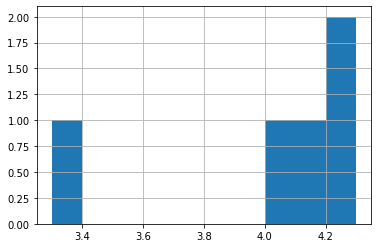

In [147]:
df.Rating.hist()

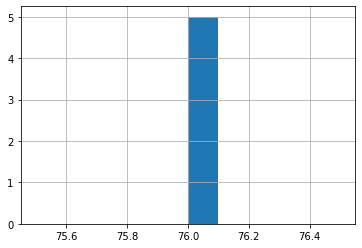

In [148]:
df.average_salary.hist()

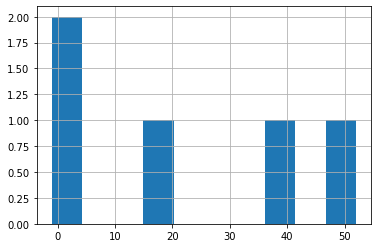

In [149]:
df.age.hist()

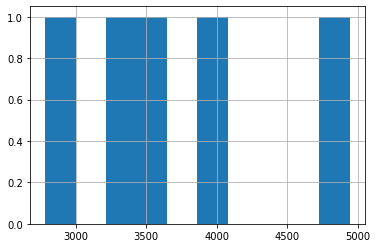

In [150]:
df.desc_len.hist()

In [151]:
df.average_salary.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

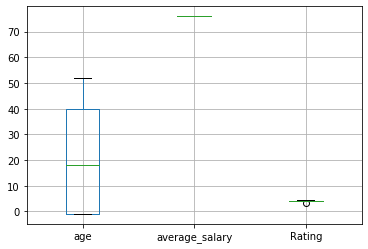

In [152]:
df.boxplot(column = ['age','average_salary','Rating'])

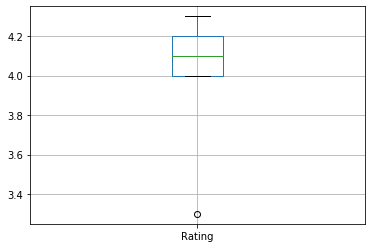

In [153]:
df.boxplot(column = ['Rating'])

In [154]:
df[['age','average_salary','Rating','desc_len']].corr()

,age,average_salary,Rating,desc_len
age,1.000000,NaN,-0.406507,-0.020620
average_salary,NaN,NaN,NaN,NaN
Rating,-0.406507,NaN,1.000000,0.768334
desc_len,-0.020620,NaN,0.768334,1.000000


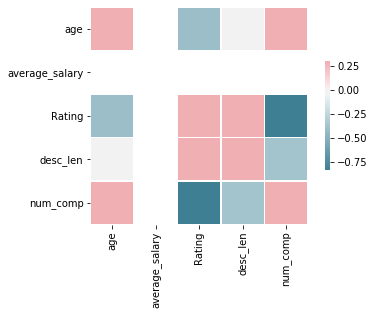

In [155]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['age','average_salary','Rating','desc_len','num_comp']].corr(), vmax=.3, center=0,cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [156]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [157]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'same_state','python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 5


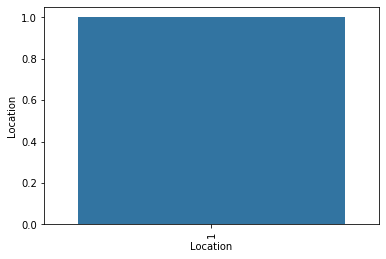

graph for Headquarters: total = 5


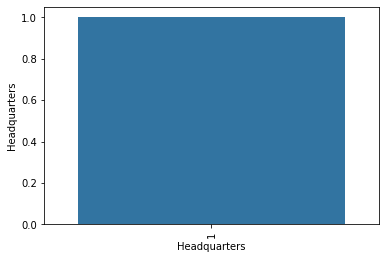

graph for Size: total = 4


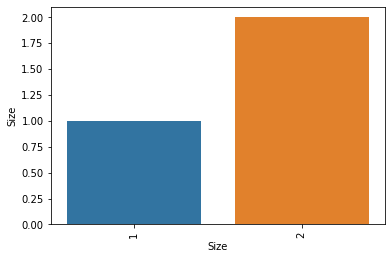

graph for Type of ownership: total = 3


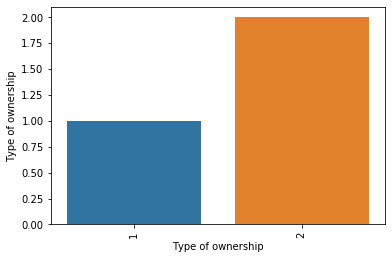

graph for Industry: total = 5


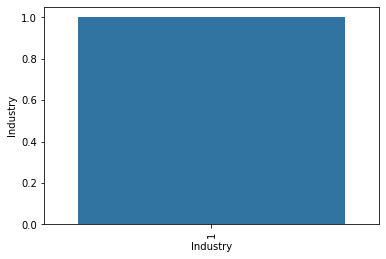

graph for Sector: total = 4


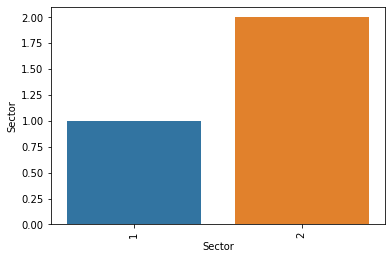

graph for Revenue: total = 3


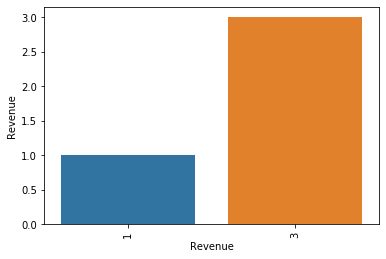

graph for company_text: total = 5


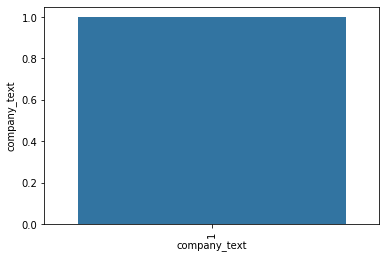

graph for job_state: total = 5


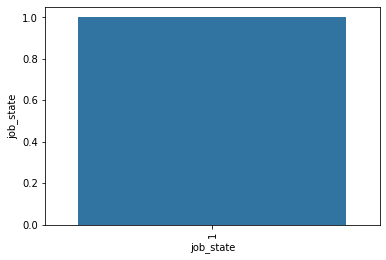

graph for same_state: total = 2


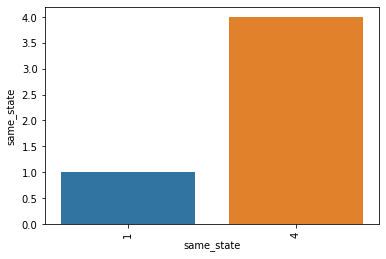

graph for python_yn: total = 2


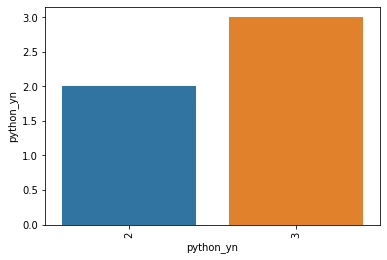

graph for R_yn: total = 1


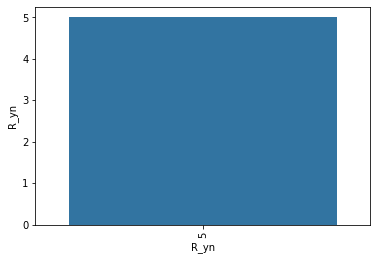

graph for spark: total = 2


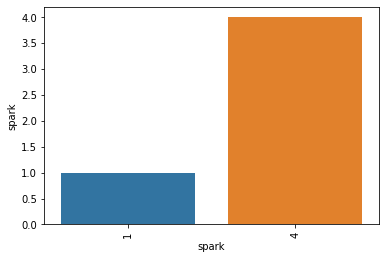

graph for aws: total = 1


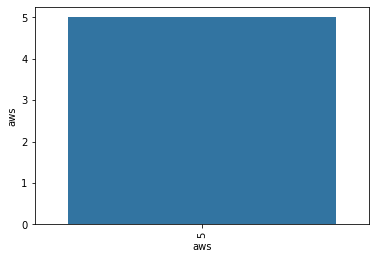

graph for excel: total = 2


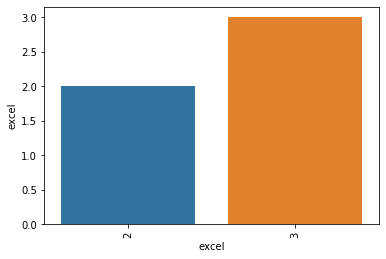

graph for job_simp: total = 4


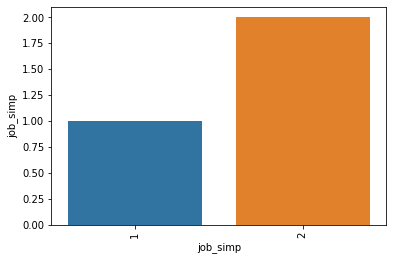

graph for seniority: total = 1


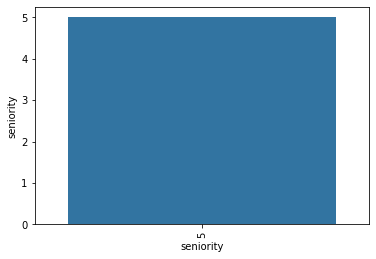

In [158]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 5


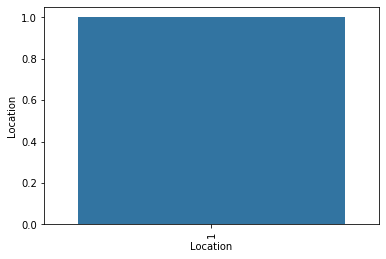

graph for Headquarters: total = 5


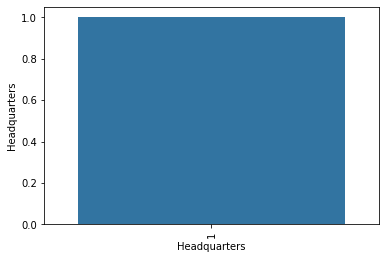

graph for company_text: total = 5


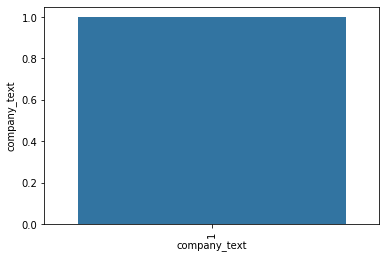

In [159]:
for i in df_cat[['Location','Headquarters','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [160]:
pd.pivot_table(df, index = 'job_simp', values = 'average_salary')

,average_salary
job_simp,
analyst,76.0
data engineer,76.0
data scienctist,76.0
mle,76.0


In [161]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salary')

,,average_salary
job_simp,seniority,
analyst,na,76.0
data engineer,na,76.0
data scienctist,na,76.0
mle,na,76.0


In [162]:
pd.pivot_table(df, index = 'job_state', values = 'average_salary').sort_values('average_salary',ascending = False)

,average_salary
job_state,
CA,76.0
CO,76.0
UT,76.0
VA,76.0
WI,76.0


In [163]:

pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salary', aggfunc = 'count').sort_values('job_state',ascending = False)

,,average_salary
job_state,job_simp,
WI,analyst,1
VA,data scienctist,1
UT,data engineer,1
CO,data scienctist,1
CA,mle,1


In [164]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [165]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership


In [166]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided','average_salary', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',  'Type of ownership'
]]

In [167]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
3.3               76.0
4.0               76.0
4.1               76.0
4.2               76.0
4.3               76.0
Industry
                                  average_salary
Industry                                        
Computer Hardware & Software                76.0
Health Care Services & Hospitals            76.0
Religious Organizations                     76.0
Research & Development                      76.0
Wholesale                                   76.0
Sector
                        average_salary
Sector                                
Business Services                 76.0
Health Care                       76.0
Information Technology            76.0
Non-Profit                        76.0
Revenue
                           average_salary
Revenue                                  
$1 to $2 billion (USD)               76.0
$50 to $100 million (USD)            76.0
Unknown / Non-Applicable             76.0
num_comp
          av

ValueError: Grouper for 'average_salary' not 1-dimensional

In [169]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'average_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),1.0,NaN
$50 to $100 million (USD),NaN,1.0
Unknown / Non-Applicable,2.0,1.0


NameError: name 'df' is not defined